**Zadanie1: Czy jest możliwe żeby dwie pierwsze komponenty objaśniały 100% wariancji danych 50D? Jeśli nie - udowodnij, jeśli tak - podaj przykład.**

Tak, jeśli rzutowane dane będą na płaszczyznach o takiej samej długości- ważności (schematycznie, gdyby zamiast kształtu eliptycznego, miałby kształt okrągły)./
Tak, bo jeśli jest dużo tych cech to będą one silniej wpływać na cumultative explained variance, niż na individual expleined variance.

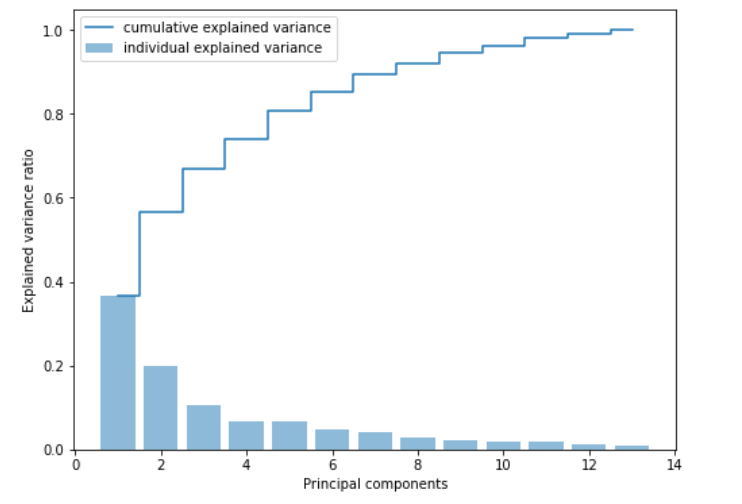

**Zadanie2: Rozważ dane iris. Dokonaj standaryzacji a następnie przeprowadź algorytm PCA. Która z cech wydaje się najistoniejsza? Ile komponentów wystarczająco dobrze opisuje te dane? Skomentuj otrzymane wyniki.**

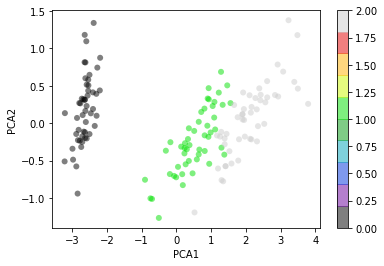

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]


array([0.71806894, 0.24442204, 0.0333455 , 0.00416351])

In [8]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

iris = datasets.load_iris()

X= iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

pca = PCA(2)
iris2 = pca.fit_transform(iris.data)

plt.scatter(iris2[:,0], iris2[:,1],
            c = iris.target, edgecolor = "none", alpha = 0.5,
            cmap = plt.cm.get_cmap('nipy_spectral',10))

plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.colorbar()
plt.show()

print(pca.components_[:3])

pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

Pierwsza komponenta opisuje największy procent danych, co świadczy, że jest najważniejsza. Dwie ostanie opisują bardzo mały procent danych. 

**Zadanie3: Rozważ jeszcze raz dane dotyczące twarzy różnych osób (fetch_lw_people) rozważane podczas ćwiczenia z SVM. Zastosuj podobnie jak wtedy PCA ze 150 komponentnami. Jaki procent wariancji opisują te komponenty? Narsuj kilka początkowych komponentów (wektory własne); oczywiście podobnie jak obrazy są to wektory 64x47 wymiarowe - przed narysowaniem należy jeszcze zastosować metodę reshape. Zastanów się nad ich interpretacją.**

In [14]:
import numpy as np
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person = 60)

X= faces.data
y= faces.target
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.3, random_state=42)
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

pca = PCA(150)
faces_pca = pca.fit_transform(faces.data)

faces2= np.reshape(faces_pca,(64,47))  #tu błąd, bo chyba w teorii źle zrozumiałam co ja mam zreshapować

plt.scatter(faces2[:,0], faces2[:,1],
            c = faces.target, edgecolor = "none", alpha = 0.5,
            cmap = plt.cm.get_cmap('nipy_spectral',10))

plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.colorbar()
plt.show()

print(pca.components_[:150])


pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

ValueError: ignored

**Zadanie4: Zauważ, że wykresy te różnią się zakresem wartości - czy to zrozumiałe?**

ICA nie widzi współczynników branych pod uwagę. Wynik może być kombinacją bezpośrednią danych, lub ich przekształceń i przemnożeń.